In [61]:
# Лабораторная работа 1 - анализ набора данных
# Группа 3374 - Гришина Анастасия Дмитриевна

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# настройка отображения графиков
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")
sns.set_style("darkgrid")

In [62]:
# датасет о автомобилях
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

print(f"Размерность данных: {df.shape}")
print(f"Количество признаков: {len(df.columns)}")
print(f"Количество наблюдений: {len(df)}")

Размерность данных: (398, 9)
Количество признаков: 9
Количество наблюдений: 398


In [63]:
# информация о датасете
print("Auto MPG Dataset - характеристики автомобилей")
print("Источник UCI Repository | Реальные данные")
print("Признаки mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name")
print("Целевая переменная mpg (миль на галлон)")

Auto MPG Dataset - характеристики автомобилей
Источник UCI Repository | Реальные данные
Признаки mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name
Целевая переменная mpg (миль на галлон)


In [64]:
# начальные данные

# первые строки таблицы датасета
display(df.head(9))

# информация
df.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [65]:
# Описание статистических данных
stats_summary = pd.DataFrame({
    'Среднее': df.select_dtypes(include=[np.number]).mean(),
    'Стандартное отклонение': df.select_dtypes(include=[np.number]).std(),
    'Медиана': df.select_dtypes(include=[np.number]).median(),
    'Минимум': df.select_dtypes(include=[np.number]).min(),
    'Максимум': df.select_dtypes(include=[np.number]).max(),
    'Количество пропусков': df.isnull().sum()
})
display(stats_summary.round(3))

,Среднее,Стандартное отклонение,Медиана,Минимум,Максимум,Количество пропусков
acceleration,15.568,2.758,15.5,8.0,24.8,0
car_name,NaN,NaN,NaN,NaN,NaN,0
cylinders,5.455,1.701,4.0,3.0,8.0,0
displacement,193.426,104.270,148.5,68.0,455.0,0
horsepower,104.469,38.491,93.5,46.0,230.0,6
model_year,76.010,3.698,76.0,70.0,82.0,0
mpg,23.515,7.816,23.0,9.0,46.6,0
origin,1.573,0.802,1.0,1.0,3.0,0
weight,2970.425,846.842,2803.5,1613.0,5140.0,0


In [66]:
# Анализ пропущенных данных
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_count,
    'Процент пропусков': missing_percent
})
missing_df = missing_df[missing_df['Количество пропусков'] > 0]

if missing_df.empty:
    print("Пропущенные значения отсутствуют")
else:
    display(missing_df.round(2))
    print("Варианты обработки пропусков")
    print("Замена средним значением для числовых признаков")
    print("Удаление строк с пропусками, если их мало")

,Количество пропусков,Процент пропусков
horsepower,6,1.51


Варианты обработки пропусков
Замена средним значением для числовых признаков
Удаление строк с пропусками, если их мало


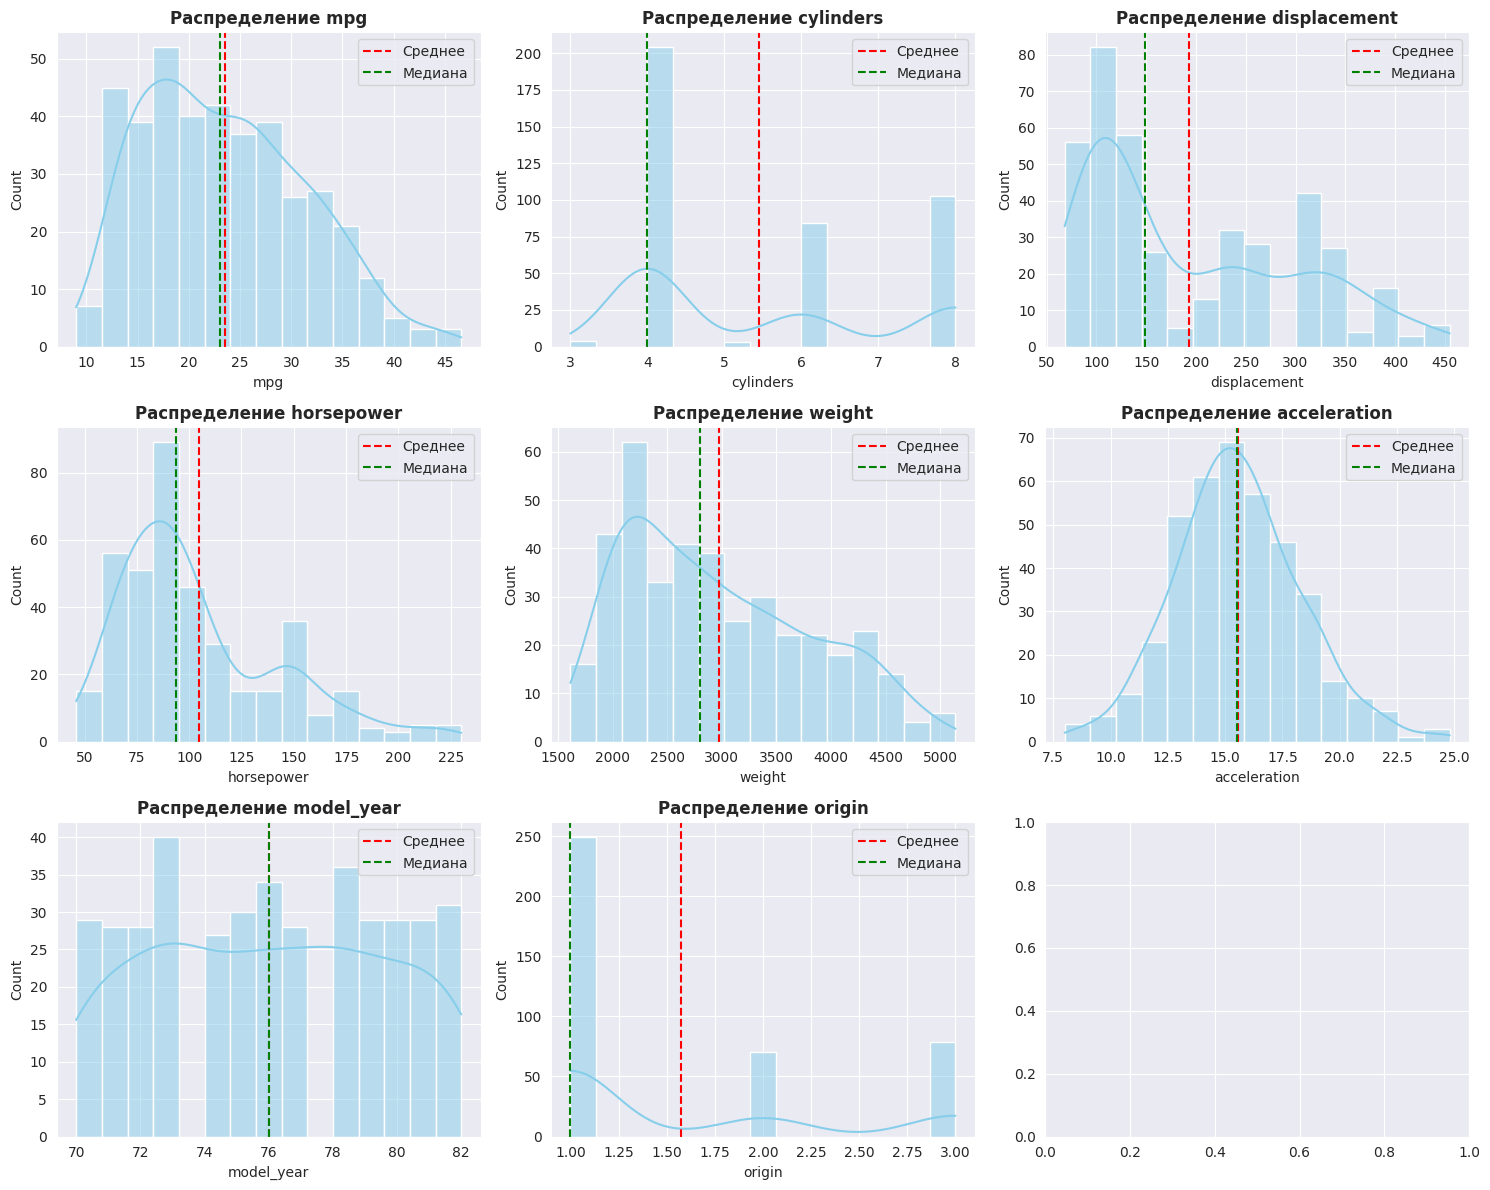

In [67]:
# Графики распределений
numeric_cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i], bins=15, color='skyblue')
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Среднее')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', label='Медиана')
        axes[i].set_title(f'Распределение {col}', fontweight='bold')
        axes[i].legend()

plt.tight_layout()
plt.show()

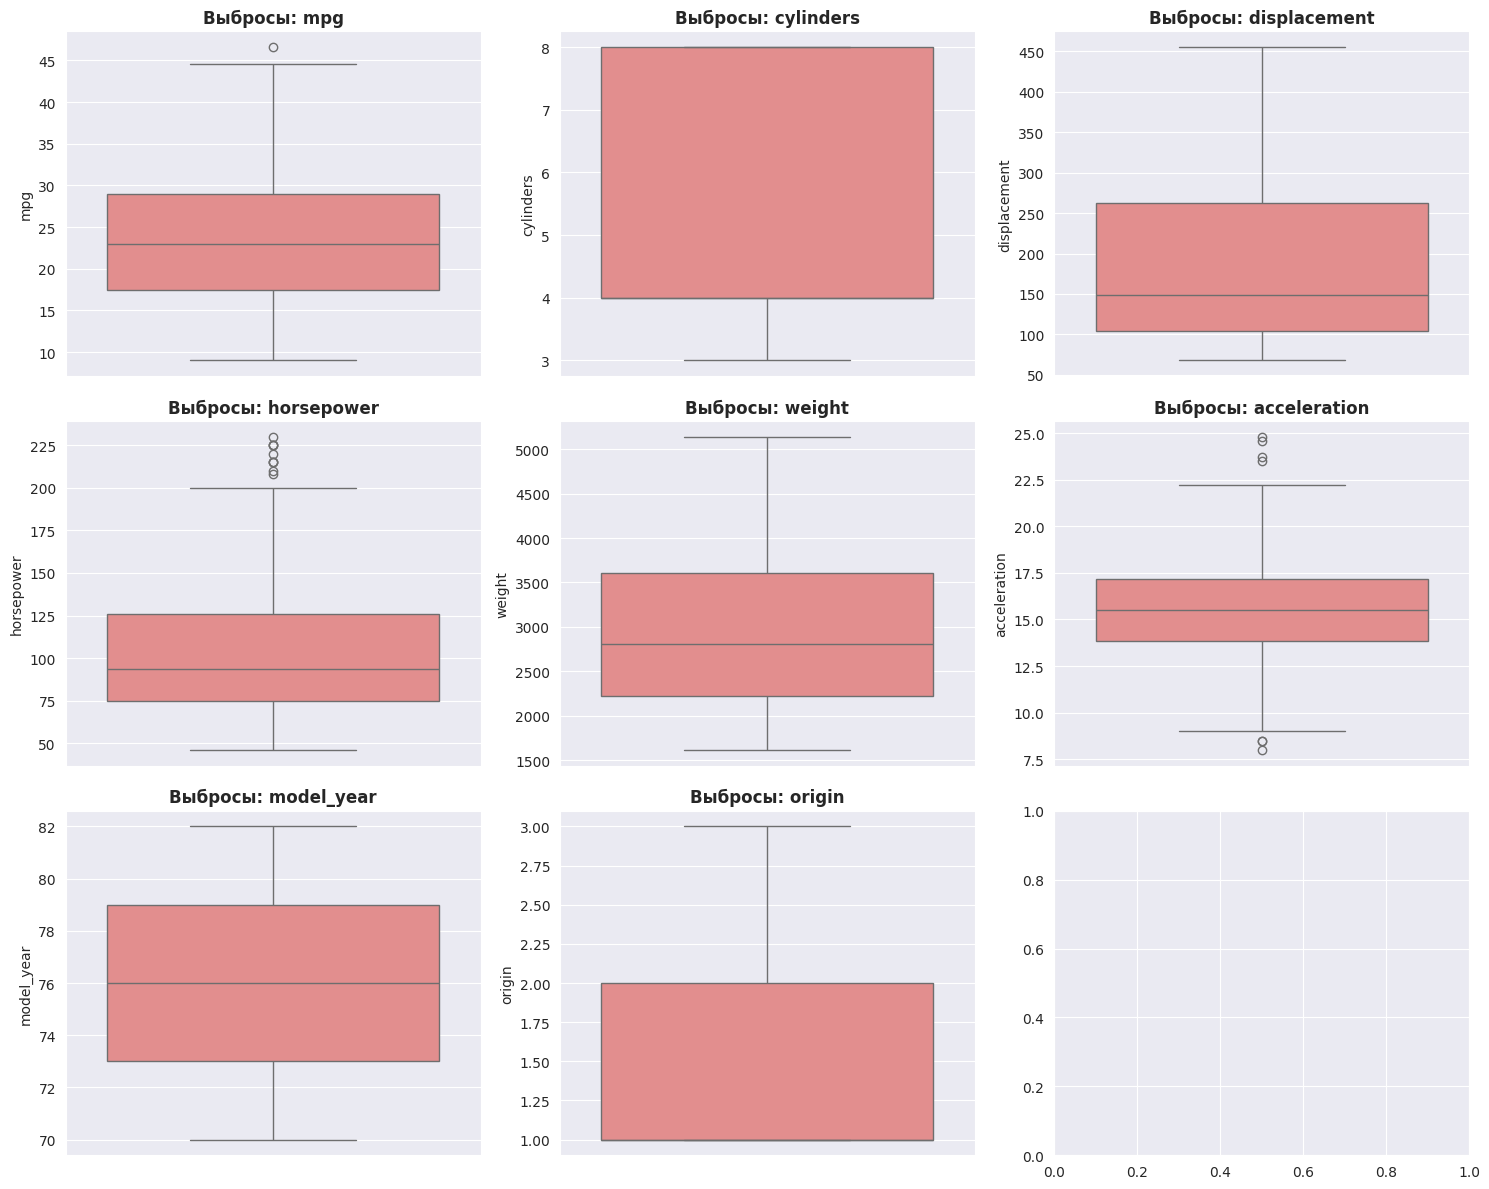

In [68]:
# График выбросов
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
        axes[i].set_title(f'Выбросы: {col}', fontweight='bold')

plt.tight_layout()
plt.show()

In [69]:
# Количественный анализ выбросов
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), f"{(len(outliers)/len(series))*100:.1f}%"

outliers_info = []
for col in numeric_cols:
    count, percentage = detect_outliers(df[col])
    outliers_info.append({
        'Признак': col,
        'Выбросы': count,
        'Процент': percentage
    })

outliers_df = pd.DataFrame(outliers_info)
display(outliers_df)

high_outliers = outliers_df[outliers_df['Процент'].str.replace('%', '').astype(float) > 5]
if not high_outliers.empty:
    # Признаки с > 5%
    print("Признаки с большим количеством выбросов:")
    for _, row in high_outliers.iterrows():
        print(f"  • {row['Признак']}: {row['Выбросы']} ({row['Процент']})")

,Признак,Выбросы,Процент
0,mpg,1,0.3%
1,cylinders,0,0.0%
2,displacement,0,0.0%
3,horsepower,10,2.5%
4,weight,0,0.0%
5,acceleration,7,1.8%
6,model_year,0,0.0%
7,origin,0,0.0%


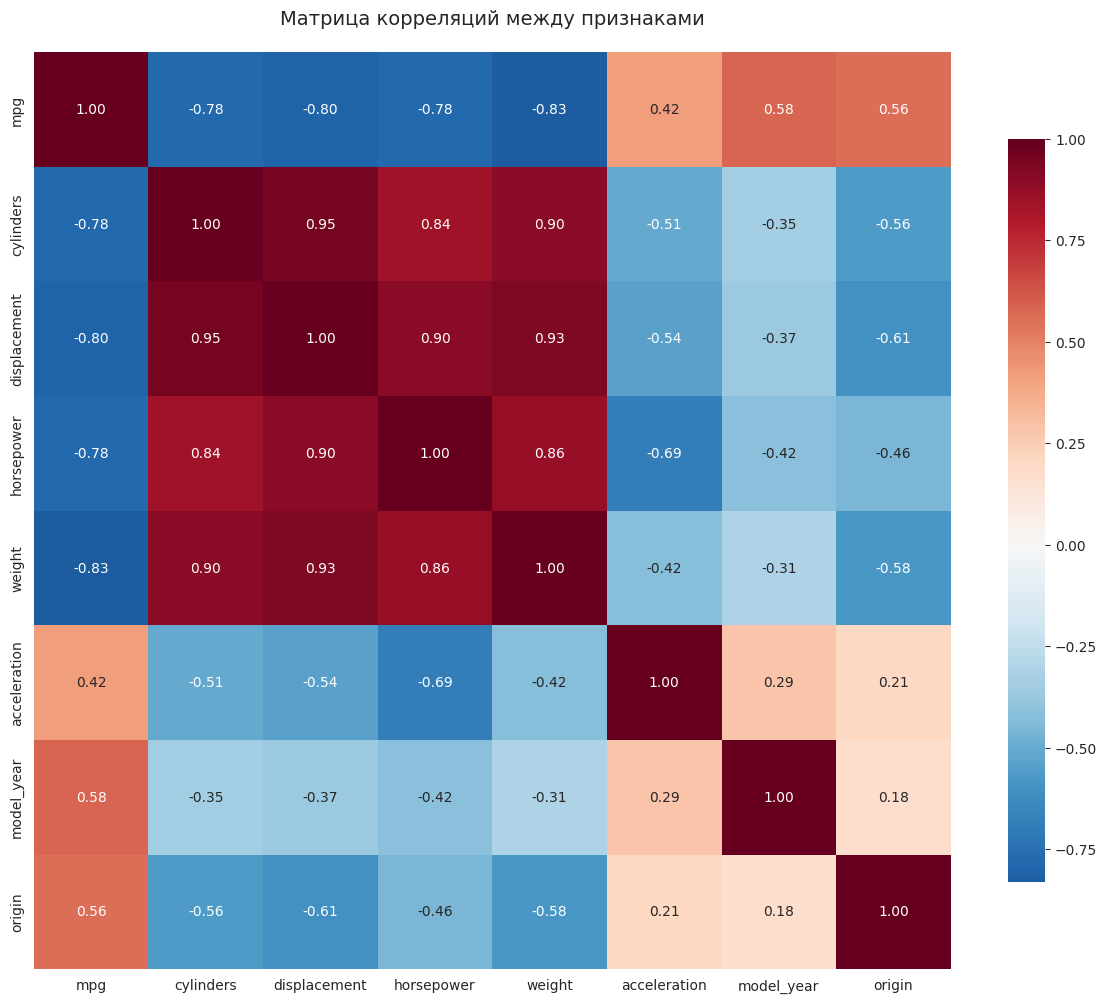

In [70]:
# Корреляционный анализ
# Матрица корреляций
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Матрица корреляций между признаками', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [71]:
# Анализ сильных корреляций
# Сильная корреляция, где |r| > 0.7
print("Сильная корреляция")
strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.7:
            strong_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr))

if strong_correlations:
    for col1, col2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
        direction = "положительная" if corr > 0 else "отрицательная"
        print(f"  {col1} == {col2}: {corr:.3f} ({direction})")
else:
    print("  Сильные корреляции отсутствуют")

# Корреляции с целевой переменной (mpg)
print("Корреляция с mpg")
mpg_corr = corr_matrix['mpg'].sort_values(ascending=False)
for feature, corr_value in mpg_corr.items():
    if feature != 'mpg' and abs(corr_value) > 0.3:
        direction = "положительная" if corr_value > 0 else "отрицательная"
        print(f"  {feature}: {corr_value:.3f} ({direction})")

Сильная корреляция
  cylinders == displacement: 0.951 (положительная)
  displacement == weight: 0.933 (положительная)
  displacement == horsepower: 0.897 (положительная)
  cylinders == weight: 0.896 (положительная)
  horsepower == weight: 0.865 (положительная)
  cylinders == horsepower: 0.843 (положительная)
  mpg == weight: -0.832 (отрицательная)
  mpg == displacement: -0.804 (отрицательная)
  mpg == horsepower: -0.778 (отрицательная)
  mpg == cylinders: -0.775 (отрицательная)
Корреляция с mpg
  model_year: 0.579 (положительная)
  origin: 0.563 (положительная)
  acceleration: 0.420 (положительная)
  cylinders: -0.775 (отрицательная)
  horsepower: -0.778 (отрицательная)
  displacement: -0.804 (отрицательная)
  weight: -0.832 (отрицательная)


Анализируемые признаки: ['weight', 'displacement', 'horsepower', 'cylinders']
Заполнено 6 пропусков в horsepower медианой: 93.5


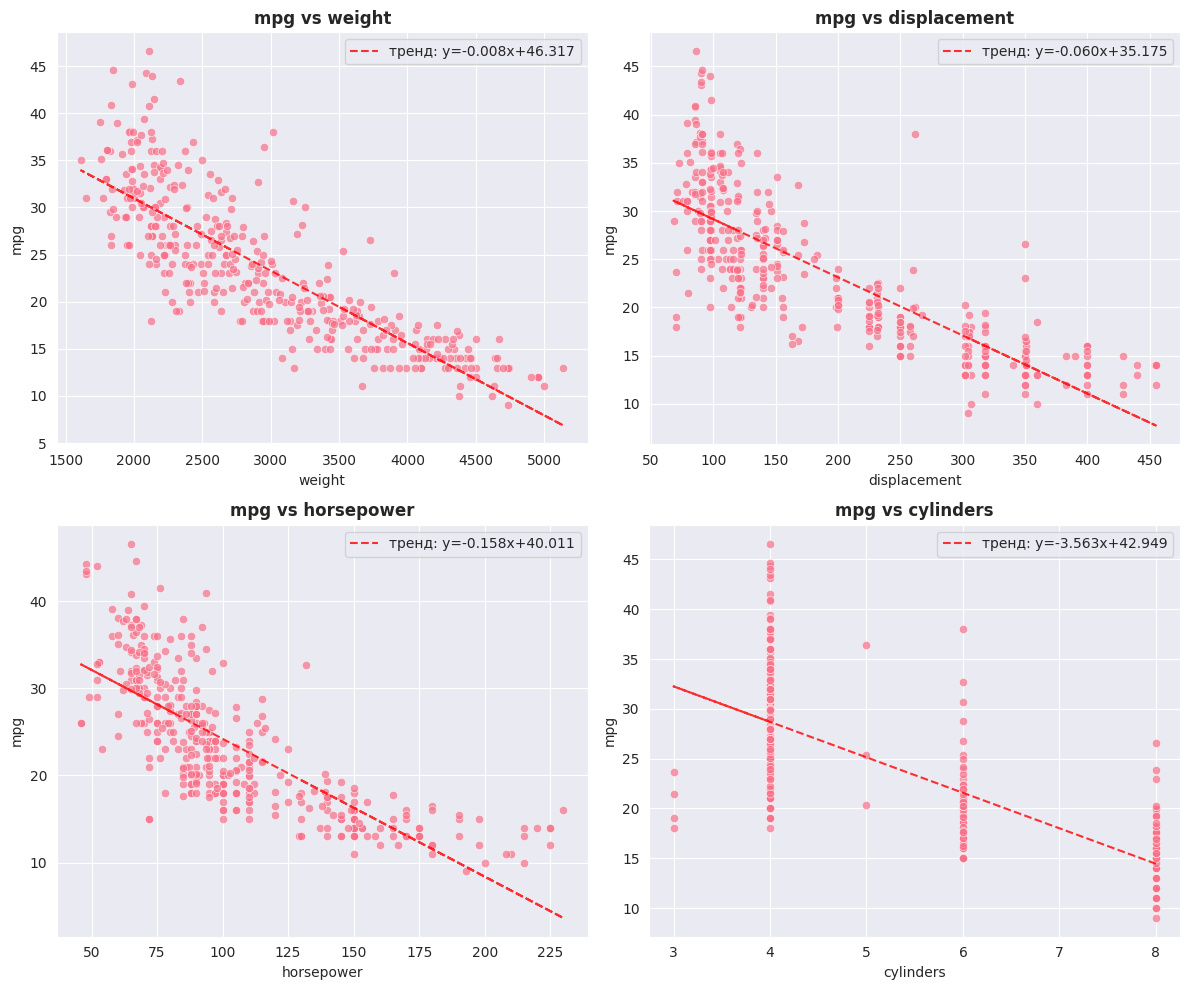

In [72]:
# Прямой график рассеивания
# Выберем наиболее коррелированные с mpg признаки
top_features = mpg_corr.abs().sort_values(ascending=False).index[1:5]  # исключаем mpg
print(f"Анализируемые признаки: {list(top_features)}")

# Создаем копию данных и обрабатываем пропуски
analysis_df = df[list(top_features) + ['mpg']].copy()

# Заполняем пропуски в horsepower медианным значением
if 'horsepower' in analysis_df.columns and analysis_df['horsepower'].isnull().any():
    horsepower_median = analysis_df['horsepower'].median()
    analysis_df['horsepower'] = analysis_df['horsepower'].fillna(horsepower_median)
    print(f"Заполнено {df['horsepower'].isnull().sum()} пропусков в horsepower медианой: {horsepower_median}")

# Упрощенная матрица scatter plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    # Проверяем, что в данных нет пропусков
    if analysis_df[feature].isnull().any():
        print(f"Предупреждение: в признаке {feature} все еще есть пропуски")
        continue

    sns.scatterplot(data=analysis_df, x=feature, y='mpg', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'mpg vs {feature}', fontweight='bold')

    # Добавляем линию тренда
    try:
        z = np.polyfit(analysis_df[feature], analysis_df['mpg'], 1)
        p = np.poly1d(z)
        axes[i].plot(analysis_df[feature], p(analysis_df[feature]), "r--", alpha=0.8,
                    label=f'тренд: y={z[0]:.3f}x+{z[1]:.3f}')
        axes[i].legend()
    except Exception as e:
        print(f"Ошибка при построении тренда для {feature}: {e}")

plt.tight_layout()
plt.show()

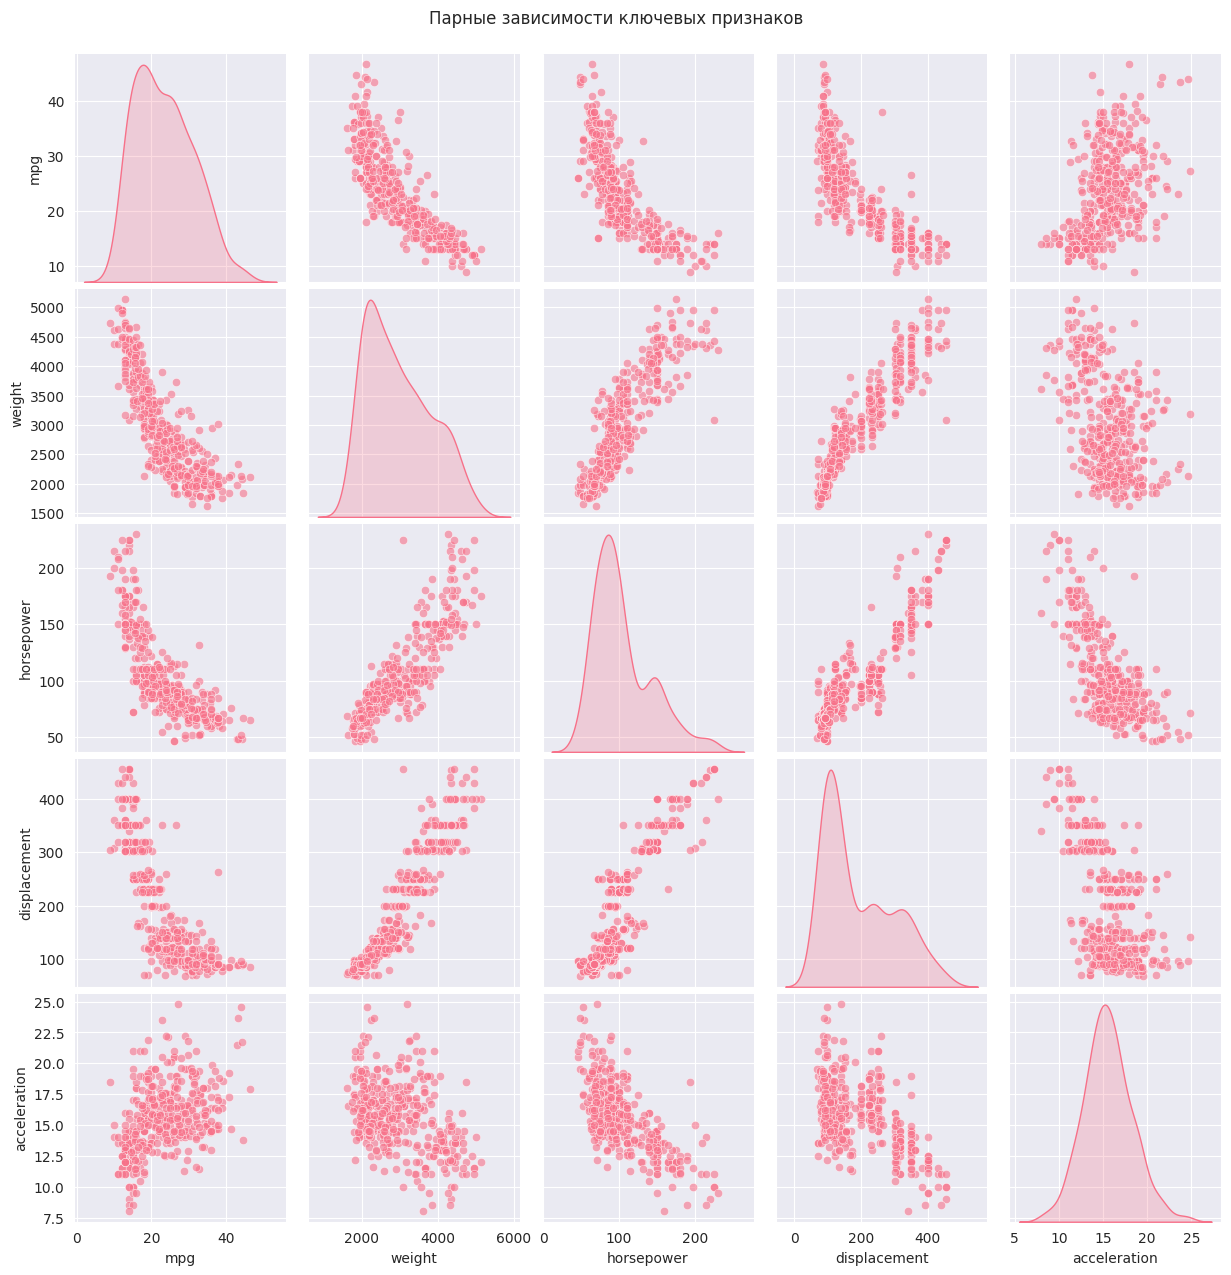

In [73]:
# Парные графики ключевых признаков
key_features = ['mpg', 'weight', 'horsepower', 'displacement', 'acceleration']
sns.pairplot(df[key_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Парные зависимости ключевых признаков', y=1.02)
plt.show()

In [74]:
# Проанализирован датасет Auto MPG (398 автомобилей, 9 признаков).
# Обнаружены пропуски в horsepower и выбросы в нескольких признаках.
# Выявлены сильные корреляции: расход топлива (mpg) сильно зависит от веса и мощности
# (отрицательная связь), а также взаимосвязи между техническими характеристиками.